In [9]:
from rgs_interface.data.interface import fetch_rgs_data, fetch_timeseries_data, fetch_patients

In [10]:
patients = fetch_patients()
patient_ids = patients.PATIENT_ID.tolist()

Database engine created successfully
Database engine closed


#### SESSION

In [11]:
modes = ["app", "plus"]
data = []

for m in modes:
    ss = fetch_rgs_data(
        rgs_mode=m,
        patient_ids=patient_ids
    )
    data.append(ss)

Database engine created successfully
Database engine closed
Database engine created successfully
Database engine closed


In [12]:
import pandas as pd 
df = pd.concat(data)

#### TIMESERIES 

In [13]:
data_ts = []

for m in modes:
    ts = fetch_timeseries_data(
        rgs_mode=m,
        patient_ids=patient_ids
    )
    data_ts.append(ts)

Database engine created successfully
Database engine closed
Database engine created successfully
Database engine closed
Database engine created successfully
Database engine closed
Database engine created successfully
Database engine closed


In [6]:
df_ts = pd.concat(data_ts)

#### METRICS

`mean adherence`

In [28]:
mean_adherence = df.groupby(["PROTOCOL_ID"])["ADHERENCE"].mean()

In [29]:
mean_adherence

PROTOCOL_ID
200    0.532875
201    0.814945
202    0.874789
203    0.763286
204    0.799902
205    0.797363
206    0.702985
208     0.75109
209    0.743789
210    0.710714
211    0.888709
213    0.542921
214    0.860351
215    0.887193
216    0.864019
217    0.856294
218    0.854879
219    0.793036
220    0.540822
221    0.787426
222    0.843148
223    0.863902
224    0.933503
225    0.837028
226    0.751014
227    0.798485
228      0.5574
229    0.192236
230    0.646056
231    0.891341
232    0.207842
233    0.361167
234    0.260175
301     0.87444
302    0.870954
303    0.824709
304    0.867019
307    0.821576
309    0.768003
310    0.419444
311    0.617593
Name: ADHERENCE, dtype: Float64

`mean dm`

In [30]:
from ai_cdss.data_processor import DataProcessor
processor = DataProcessor([1,1,1], alpha=0.5)

In [31]:
df_ts = df_ts.sort_values(by=["PATIENT_ID", "PROTOCOL_ID", "SESSION_ID", "SECONDS_FROM_START"])

In [32]:
# Compute delta first (change between consecutive rows)
df_ts["DM_DELTA"] = df_ts.groupby(["PATIENT_ID", "PROTOCOL_ID"])["DM_VALUE"].diff().fillna(0)
df_ts["PE_DELTA"] = df_ts.groupby(["PATIENT_ID", "PROTOCOL_ID"])["PE_VALUE"].diff().fillna(0)

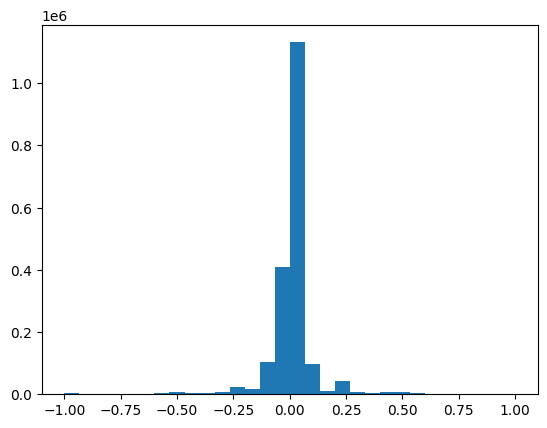

In [33]:
import matplotlib.pyplot as plt
plt.hist(df_ts["DM_DELTA"], bins=30)
plt.show()

INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


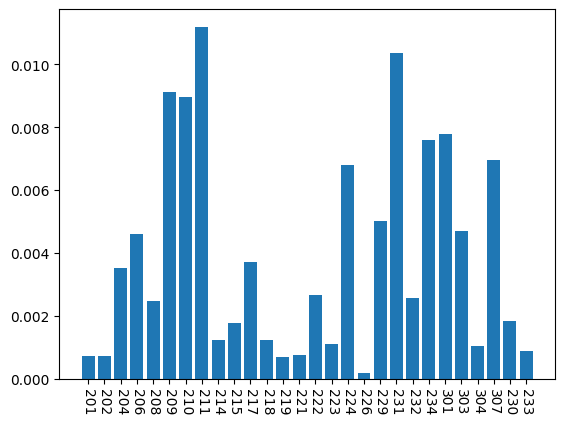

In [34]:
mean_deltadm = df_ts.groupby(["PROTOCOL_ID"])["DM_DELTA"].mean()
protocol_ids = df_ts["PROTOCOL_ID"].unique().astype("str") 
plt.bar(x = protocol_ids, height=mean_deltadm)
plt.xticks(rotation=270)
# plt.title()
plt.show()

INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


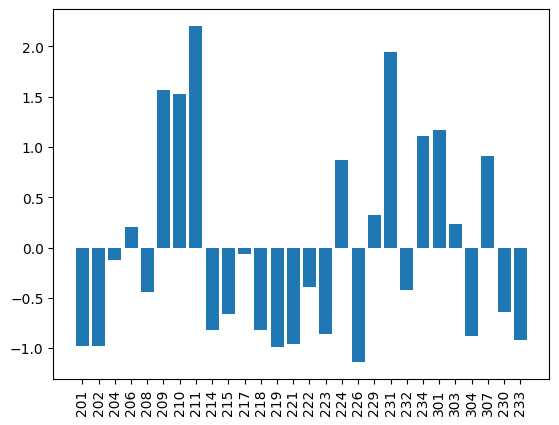

In [35]:
from scipy.stats import zscore

z_scores = zscore(mean_deltadm)
plt.bar(protocol_ids, z_scores)
plt.xticks(rotation=90)
plt.show()

In [38]:
init = pd.merge(mean_adherence, mean_deltadm, on="PROTOCOL_ID", how="left")

In [41]:
init = init.fillna(0)

In [42]:
init.to_csv("init_metrics.csv")

In [7]:
test = pd.read_csv("init_metrics.csv")

In [8]:
test

,PROTOCOL_ID,ADHERENCE,DM_DELTA
0,201,0.814907,0.000715
1,202,0.874712,0.000709
2,204,0.799902,0.003516
3,206,0.702985,0.004604
4,208,0.751090,0.002470
5,209,0.743622,0.009130
6,210,0.710714,0.008971
7,211,0.888709,0.011196
8,214,0.860511,0.001245
9,215,0.887144,0.001772
